In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#import seaborn as sns
#import sklearn.datasets as skldata
#import scipy.special as scspec
#import scipy as sp
#import scipy.optimize
#import types
#from sup_funcs import backtracking, get_x_y_from_callback

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=3,
                  random_state=0)

In [52]:
def topK(gradient, k):
    N = gradient.shape[0]
    sortedGradient = sorted(list(enumerate(gradient)), key=lambda elem : abs(elem[1]), reverse=True)
    result = np.zeros(N)
    for i in range(k):
        result[sortedGradient[i][0]] = sortedGradient[i][1]
    return result

In [53]:
import math

sigma = lambda x : 1 / (1 + np.exp(-x))

def gradf(theta, X, y):
    N, dim = X.shape
    res = np.zeros(dim)
    for i in range(N):
        res += (y[i] - sigma(theta @ X[i].T)) * X[i]
    return res

def calculateLoss(theta, X, y):
    N, dim = X.shape
    res = 0
    for i in range(N):
        res += y[i] * np.log(sigma(theta @ X[i].T)) + (1 - y[i]) * np.log(1 - sigma(theta @ X[i].T))
    return res

In [60]:
def GradientDescent(gradf, theta0, X, y, max_iter=1000000, tol=1e-2, compression=None):
    theta = theta0.copy()
    iteration = 0
    gradients = []
    conv_array = []
    loss = []

    while True:
        alpha = 0.04
        conv_array.append(theta)
        loss.append(calculateLoss(theta, X, y))
        gradient = gradf(theta, X, y)
        gradients.append(np.linalg.norm(gradient))
        if compression:
            gradient = compression(gradient)
        theta = theta + alpha * gradient

        iteration += 1
        if np.linalg.norm(gradient) < tol:
            break
        if iteration >= max_iter:
            break
    res = {
        "num_iter": iteration,
        "loss": loss,
        "gradients": gradients,
        "tol": np.linalg.norm(gradient),
        "conv_array": conv_array,
    }
    return res

In [61]:
N, dim = X.shape
Xones = (np.insert(X.T, 0, np.ones(N, dtype=np.intc)).reshape(dim+1, N)).T

withoutCompression = GradientDescent(gradf, np.zeros(dim + 1), Xones, y)
withTopK = GradientDescent(gradf, np.zeros(dim + 1), Xones, y, compression=lambda x: topK(x, (dim + 1) // 2))

/var/folders/z5/jmyhqr355xq_jskwvzr8yr51wp6lt2/T/ipykernel_69300/3513193862.py:16: RuntimeWarning: divide by zero encountered in log
  res += y[i] * np.log(sigma(theta @ X[i].T)) + (1 - y[i]) * np.log(1 - sigma(theta @ X[i].T))
/var/folders/z5/jmyhqr355xq_jskwvzr8yr51wp6lt2/T/ipykernel_69300/3513193862.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  res += y[i] * np.log(sigma(theta @ X[i].T)) + (1 - y[i]) * np.log(1 - sigma(theta @ X[i].T))


In [65]:
print(withoutCompression['loss'], withTopK['loss'])

[-69.31471805599459, -3.6177838030618115, -3.2070831625723937, -2.8784739491533395, -2.60081317897051, -2.3583984518425067, -2.142547316996124, -1.94814994366511, -1.772044885543239, -1.6121671487501372, -1.4670649194657506, -1.335612893075717, -1.2168418892073392, -1.1098429726816879, -1.0137209915713772, -0.9275801298804787, -0.8505283907897191, -0.7816912218672942, -0.7202274771212711, -0.665343569895478, -0.6163038104283574, -0.5724364275630616, -0.5331356727133858, -0.49786082201237614, -0.4661329879821489, -0.43753056663494466, -0.4116839829559772, -0.3882702210751155, -0.3670074680016162, -0.34765007410432974, -0.3299839406118726, -0.31382237995823686, -0.29900245275764187, -0.2853817596566633, -0.27283565231374796, -0.26125482145293694, -0.25054321852100797, -0.2406162689817031, -0.2313993383847731, -0.22282641619311616, -0.21483898640402171, -0.20738505794486886, -0.20041833148757454, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

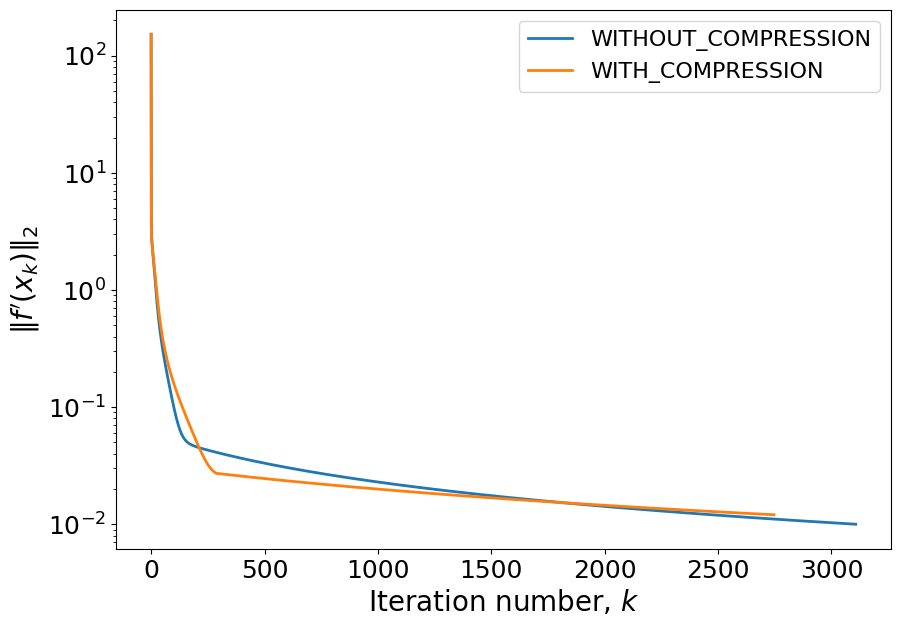

In [63]:
plt.figure(figsize=(10, 7))
plt.semilogy(
    [grad_norm for grad_norm in withoutCompression['gradients']],
    label=r"WITHOUT_COMPRESSION",
    linewidth=2
)
plt.semilogy(
    [grad_norm for grad_norm in withTopK['gradients']],
    label=r"WITH_COMPRESSION",
    linewidth=2
)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

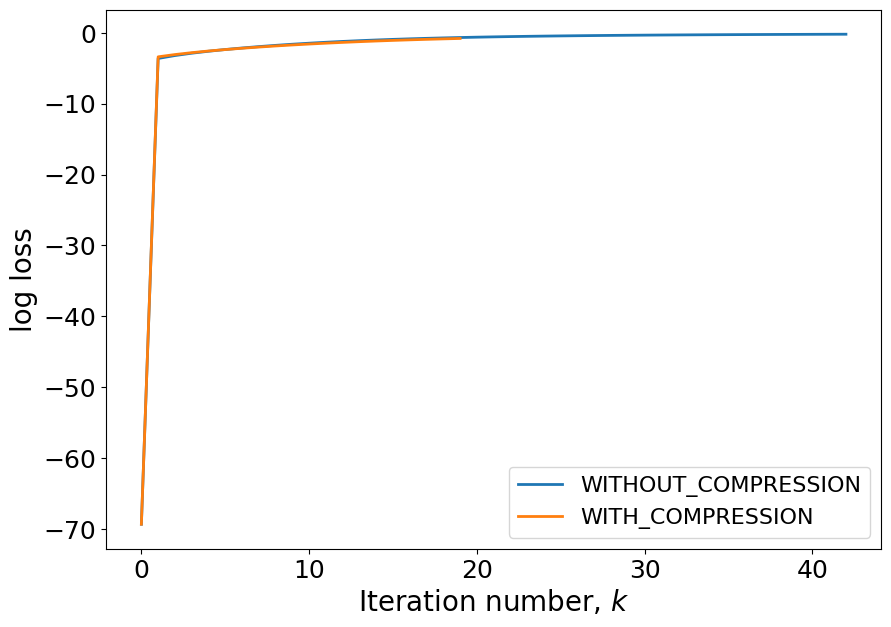

In [64]:
plt.figure(figsize=(10, 7))
plt.plot(
    [loss for loss in withoutCompression['loss']],
    label=r"WITHOUT_COMPRESSION",
    linewidth=2
)
plt.plot(
    [loss for loss in withTopK['loss']],
    label=r"WITH_COMPRESSION",
    linewidth=2
)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"log loss", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)